In [2]:
pip install lightgbm

In [4]:
# Data loading & numarical operations
import pandas as pd
import numpy as np
# Data visualization
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Data resampling
from sklearn.utils import resample
# Data Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Spliting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report
# Hyperparmeter Tuning
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv('framingham.csv')

df.head(4)

df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
print((df['glucose'].mode()[0]))

75.0


In [7]:
df['glucose'].fillna((df['glucose'].mode())[0],inplace=True)

In [8]:
df['glucose'].isnull().sum()

0

In [9]:
df.dropna(inplace=True)

In [10]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

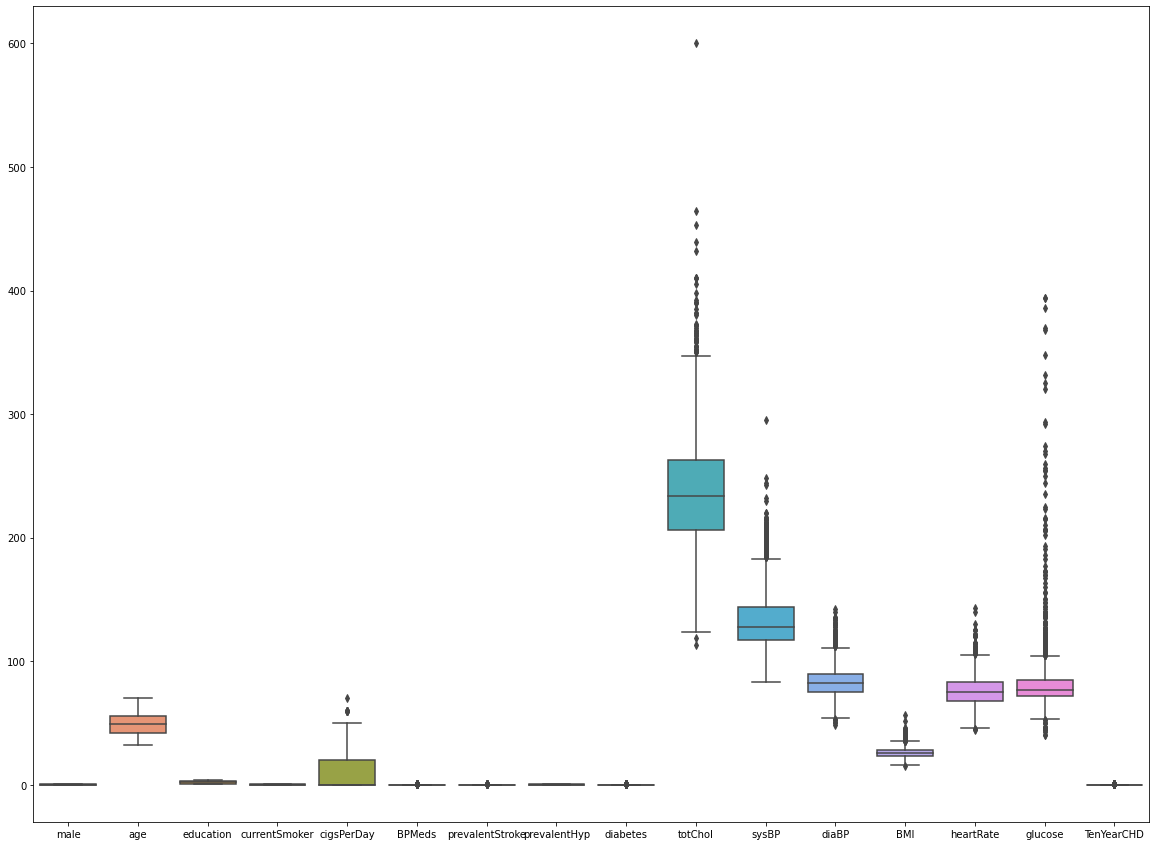

In [12]:
plt.figure(figsize=(20,15), facecolor='w')
sns.boxplot(data=df)
plt.show()

In [13]:
print(df['totChol'].mean())
print(df['totChol'].max())
print(df['sysBP'].mean())
print(df['sysBP'].max())

236.6205166792074
600.0
132.2227238525207
295.0


In [14]:
df.shape
df=df[df['totChol']<600.0]
df=df[df['sysBP']<295.0]

In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000
mean,0.433375,49.474529,1.982183,0.491343,9.024843,0.029360,0.005521,0.309159,0.025094,236.525220,132.175031,82.845295,25.770750,75.869260,81.275031,0.148808
std,0.495603,8.530533,1.020834,0.499988,11.915833,0.168835,0.074105,0.462205,0.156431,43.651946,21.798425,11.855084,4.075439,12.087749,22.960124,0.355944
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


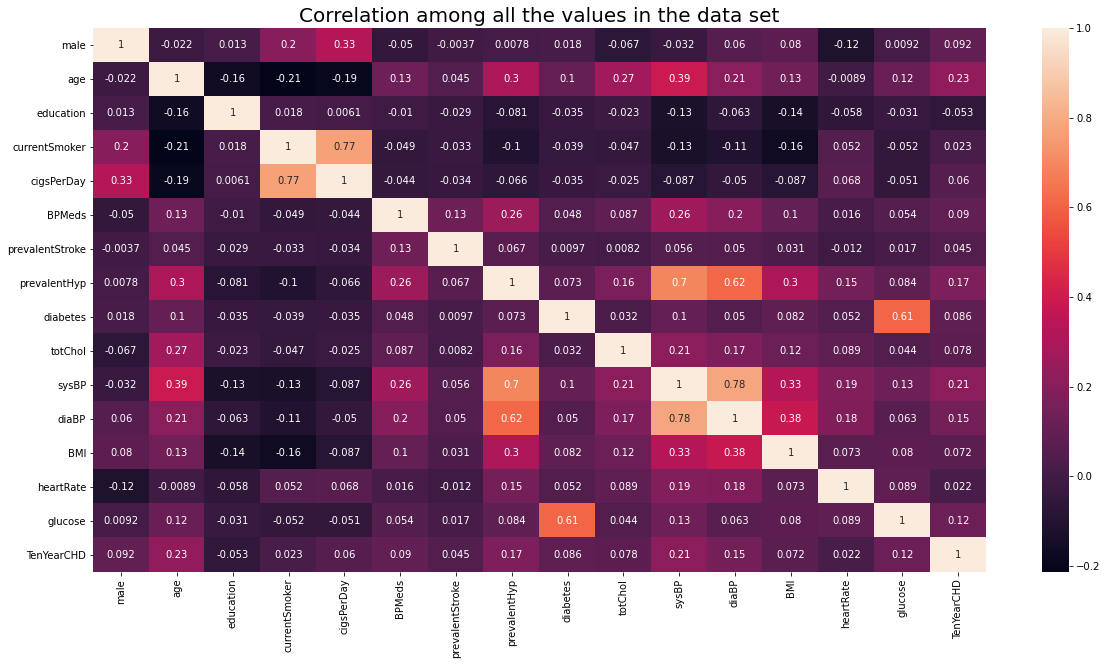

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022235,0.012785,0.201021,0.326216,-0.050110,-0.003651,0.007760,0.018333,-0.067305,-0.031883,0.059774,0.079957,-0.115356,0.009177,0.092499
age,-0.022235,1.000000,-0.160269,-0.213397,-0.190141,0.128526,0.045090,0.304449,0.104873,0.271017,0.389739,0.205375,0.133180,-0.008901,0.115920,0.228785
education,0.012785,-0.160269,1.000000,0.018139,0.006082,-0.010071,-0.028561,-0.081419,-0.034923,-0.022794,-0.127519,-0.062823,-0.135427,-0.057836,-0.031222,-0.053491
currentSmoker,0.201021,-0.213397,0.018139,1.000000,0.770709,-0.049023,-0.032582,-0.104632,-0.038941,-0.047260,-0.129664,-0.108643,-0.164071,0.052329,-0.051569,0.023460
cigsPerDay,0.326216,-0.190141,0.006082,0.770709,1.000000,-0.044031,-0.033982,-0.065883,-0.035211,-0.024816,-0.086910,-0.050297,-0.086776,0.067909,-0.050980,0.060261
BPMeds,-0.050110,0.128526,-0.010071,-0.049023,-0.044031,1.000000,0.127474,0.259984,0.048127,0.087240,0.262679,0.196835,0.103288,0.016394,0.054379,0.090173
prevalentStroke,-0.003651,0.045090,-0.028561,-0.032582,-0.033982,0.127474,1.000000,0.067408,0.009699,0.008182,0.055728,0.049543,0.031494,-0.012084,0.016515,0.044974
prevalentHyp,0.007760,0.304449,-0.081419,-0.104632,-0.065883,0.259984,0.067408,1.000000,0.073195,0.163593,0.696082,0.615298,0.303591,0.151225,0.083851,0.174948
diabetes,0.018333,0.104873,-0.034923,-0.038941,-0.035211,0.048127,0.009699,0.073195,1.000000,0.032071,0.100624,0.050413,0.082427,0.051514,0.608594,0.086188
totChol,-0.067305,0.271017,-0.022794,-0.047260,-0.024816,0.087240,0.008182,0.163593,0.032071,1.000000,0.214820,0.171610,0.122613,0.088664,0.044300,0.077971


In [16]:
cor = df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor,yticklabels=cor.columns,annot=True)
plt.title('Correlation among all the values in the data set', size=20)
plt.show()
cor

In [17]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0,0


In [18]:
# Catogorical featurs
catogorical_featurs = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [19]:
for feature in catogorical_featurs:
    print(feature,':')
    print(df[feature].value_counts())
    print('--------------------------------')

male :
0    2258
1    1727
Name: male, dtype: int64
--------------------------------
education :
1.0    1653
2.0    1209
3.0     664
4.0     459
Name: education, dtype: int64
--------------------------------
currentSmoker :
0    2027
1    1958
Name: currentSmoker, dtype: int64
--------------------------------
BPMeds :
0.0    3868
1.0     117
Name: BPMeds, dtype: int64
--------------------------------
prevalentStroke :
0    3963
1      22
Name: prevalentStroke, dtype: int64
--------------------------------
prevalentHyp :
0    2753
1    1232
Name: prevalentHyp, dtype: int64
--------------------------------
diabetes :
0    3885
1     100
Name: diabetes, dtype: int64
--------------------------------


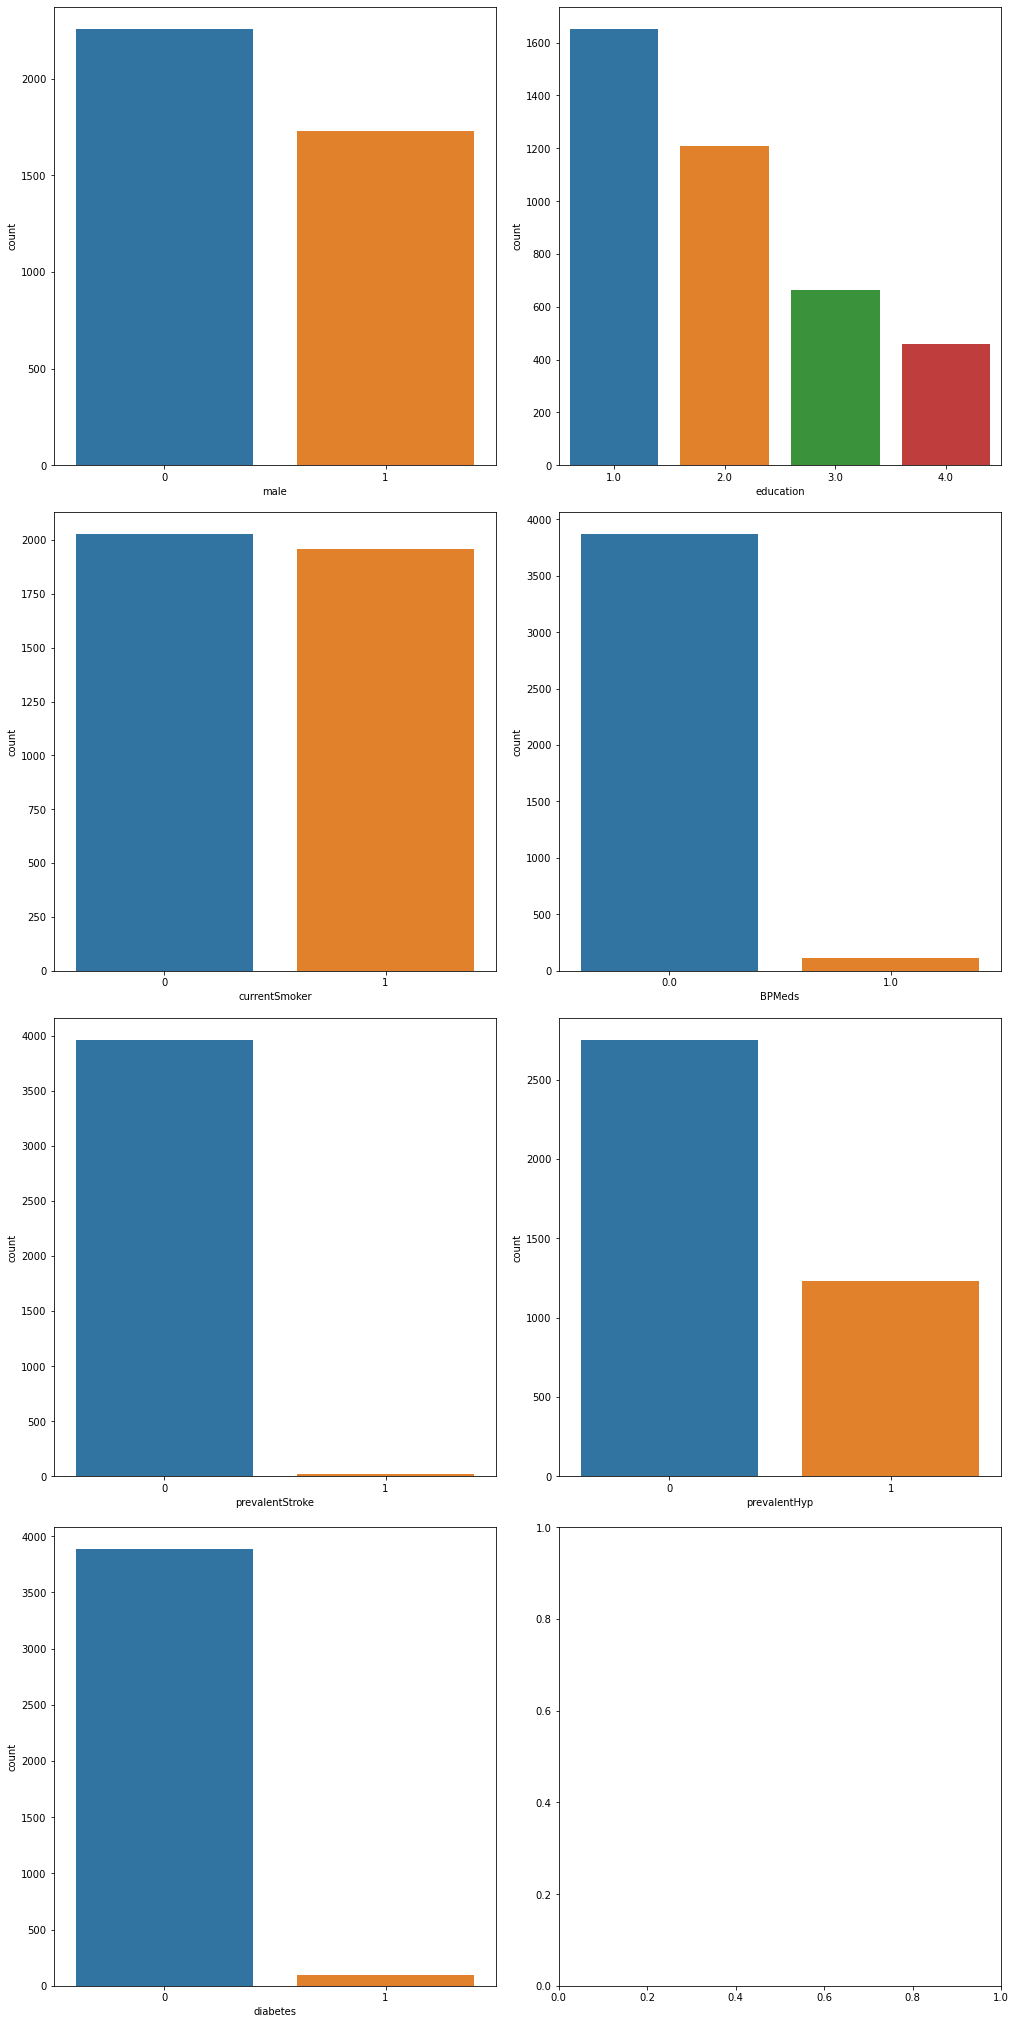

In [20]:
num_plot = len(catogorical_featurs)
total_clor = 2
total_rows = num_plot//total_clor+1
fig, axs = plt.subplots(nrows=total_rows, ncols = total_clor,
                      figsize=(7*total_clor, 7*total_rows), facecolor='w', constrained_layout=True)

for i, var in enumerate(catogorical_featurs):
    row = i//total_clor
    pos = i % total_clor
    plot = sns.countplot(x=var, data=df,ax=axs[row][pos])

Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.
There are four levels of education whereas the rest categorical features are all binary
The number of Smokers and non-Smokers in currentSmoker is almost the same

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


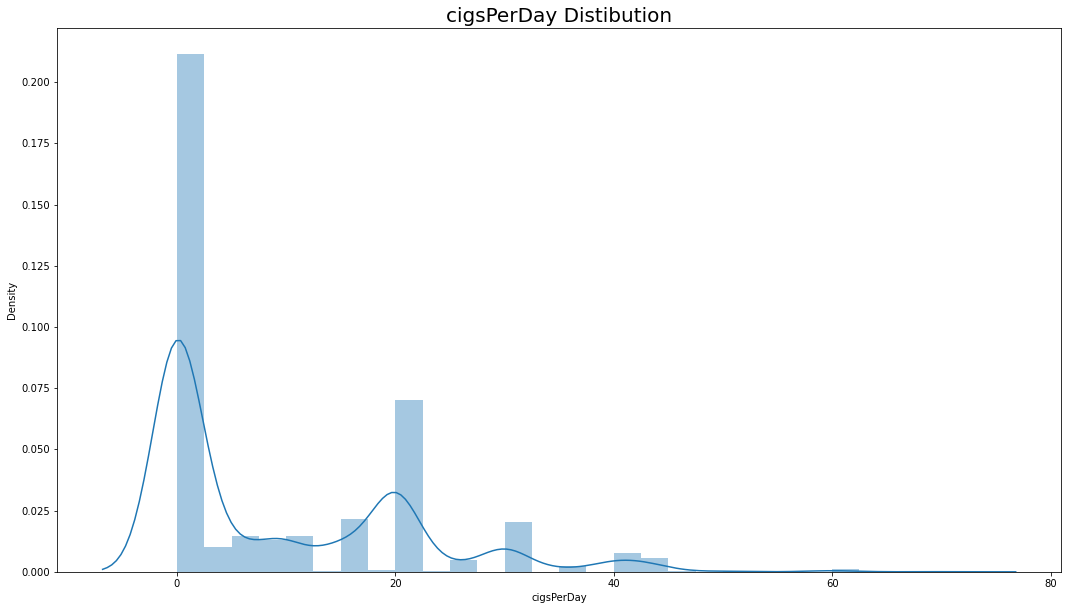

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


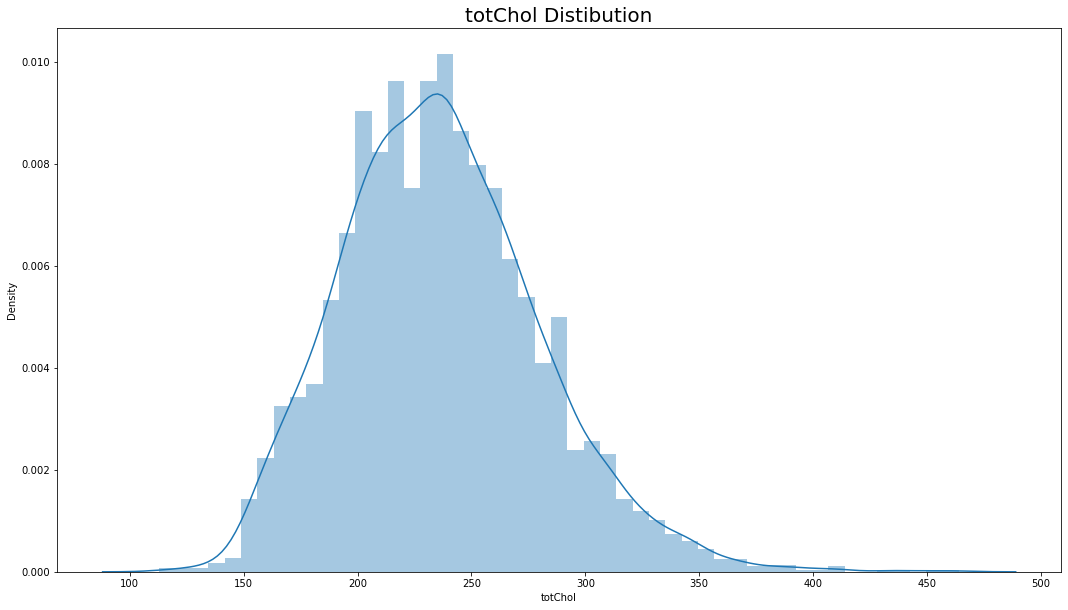

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


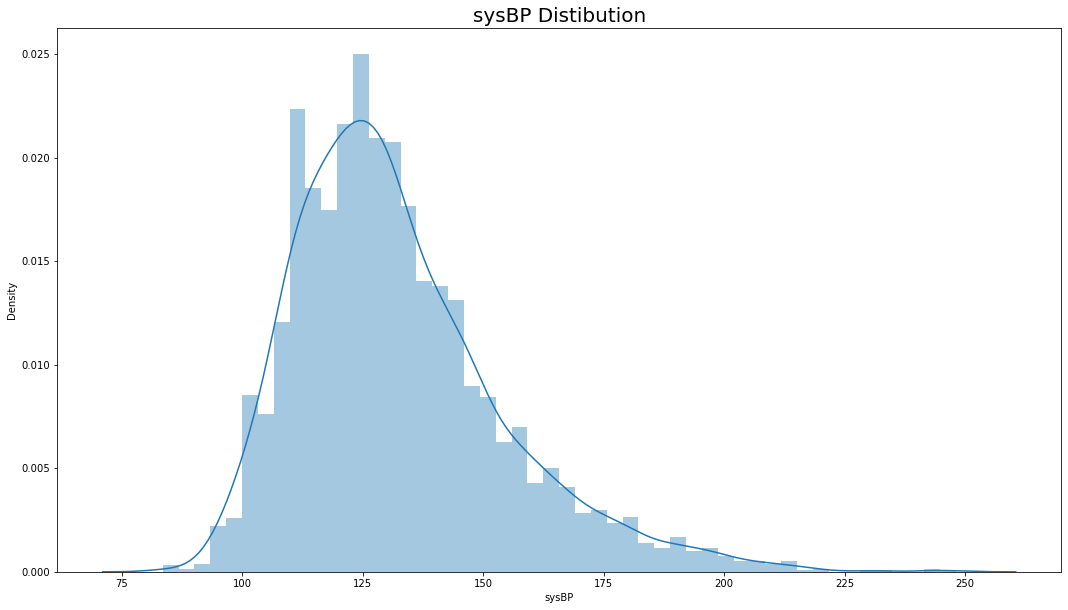

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


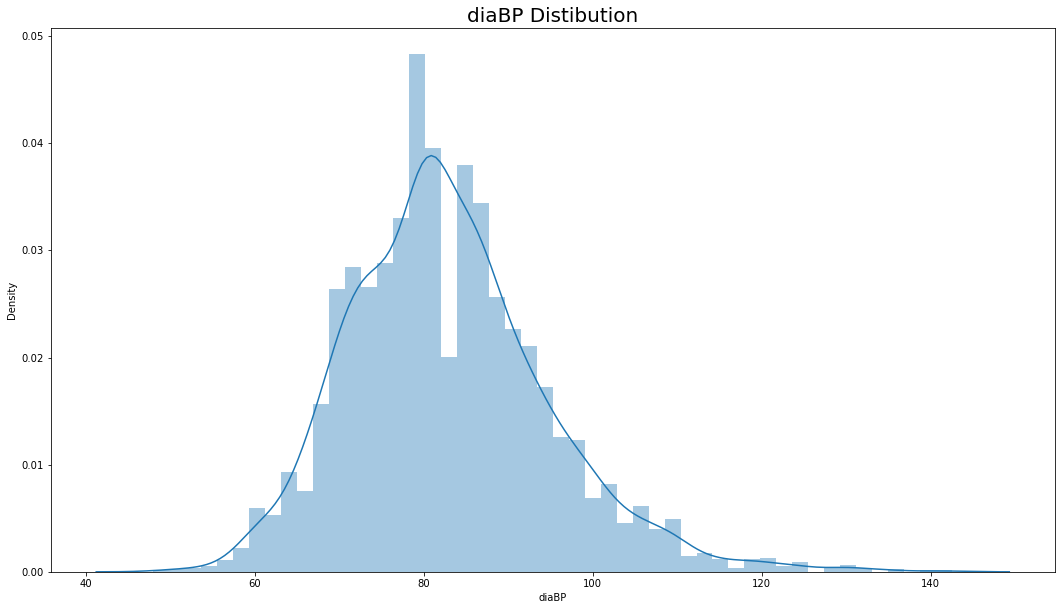

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


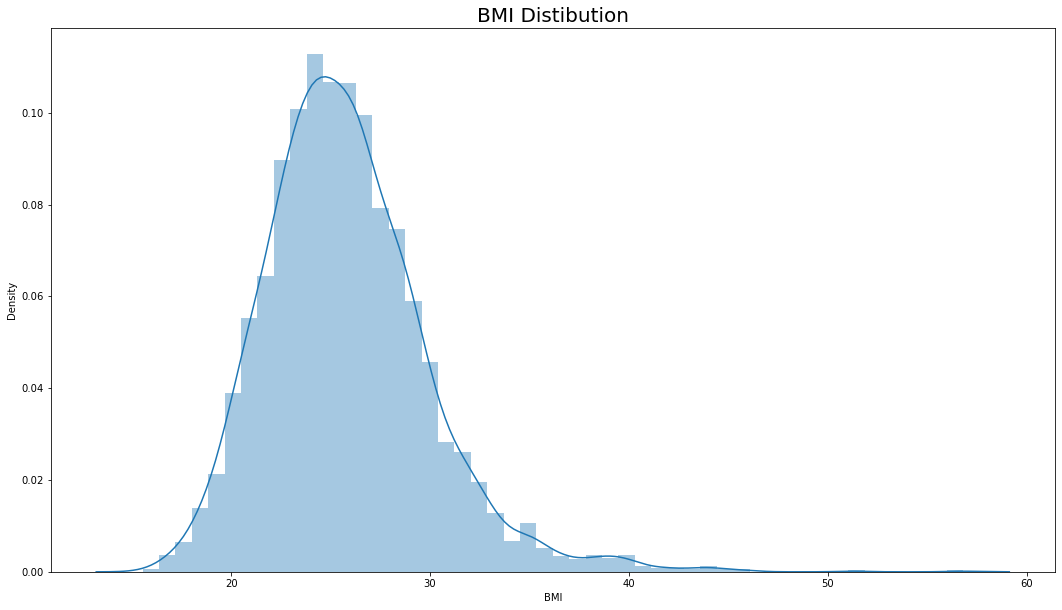

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


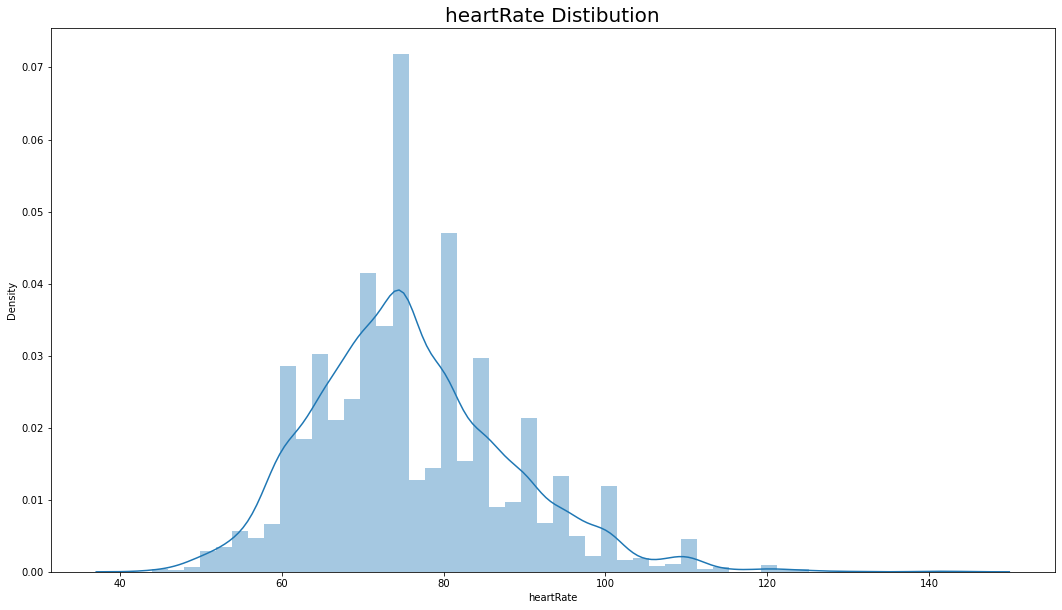

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


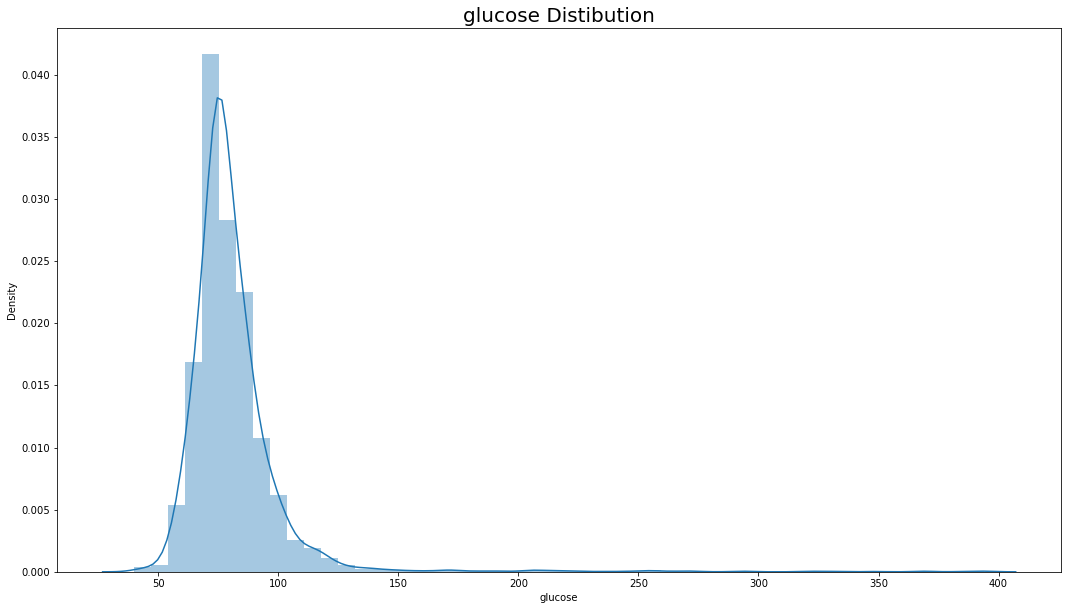

In [21]:
## Numerical Features

numerical_feartures = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for featurs in numerical_feartures:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df[featurs])
    plt.title('{} Distibution'. format(featurs), fontsize=20)
    plt.show()

#### totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed
#### cigsPerDay has a highly uneven distribution with the most data present in 0
#### cigsPerDay and sysBP shows quite a bit and slight right skewness respectively.

## Distibution of outcome variable, Heart Disease

In [22]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

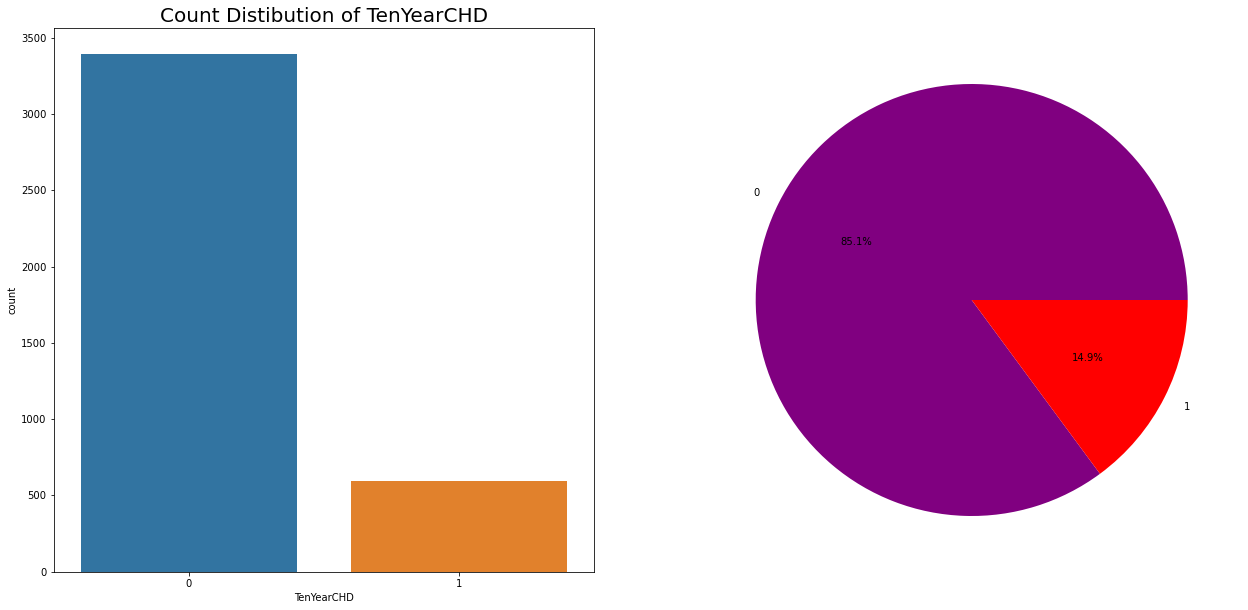

In [23]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='TenYearCHD', data=df)
plt.title('Count Distibution of TenYearCHD', size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df['TenYearCHD'].value_counts(),autopct='%1.1f%%', labels=labels,colors=['purple','red'])
plt.show()

#### The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

# Bivariate analaysis

### checking for which gender has more risk of coronary heart disease CHD

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

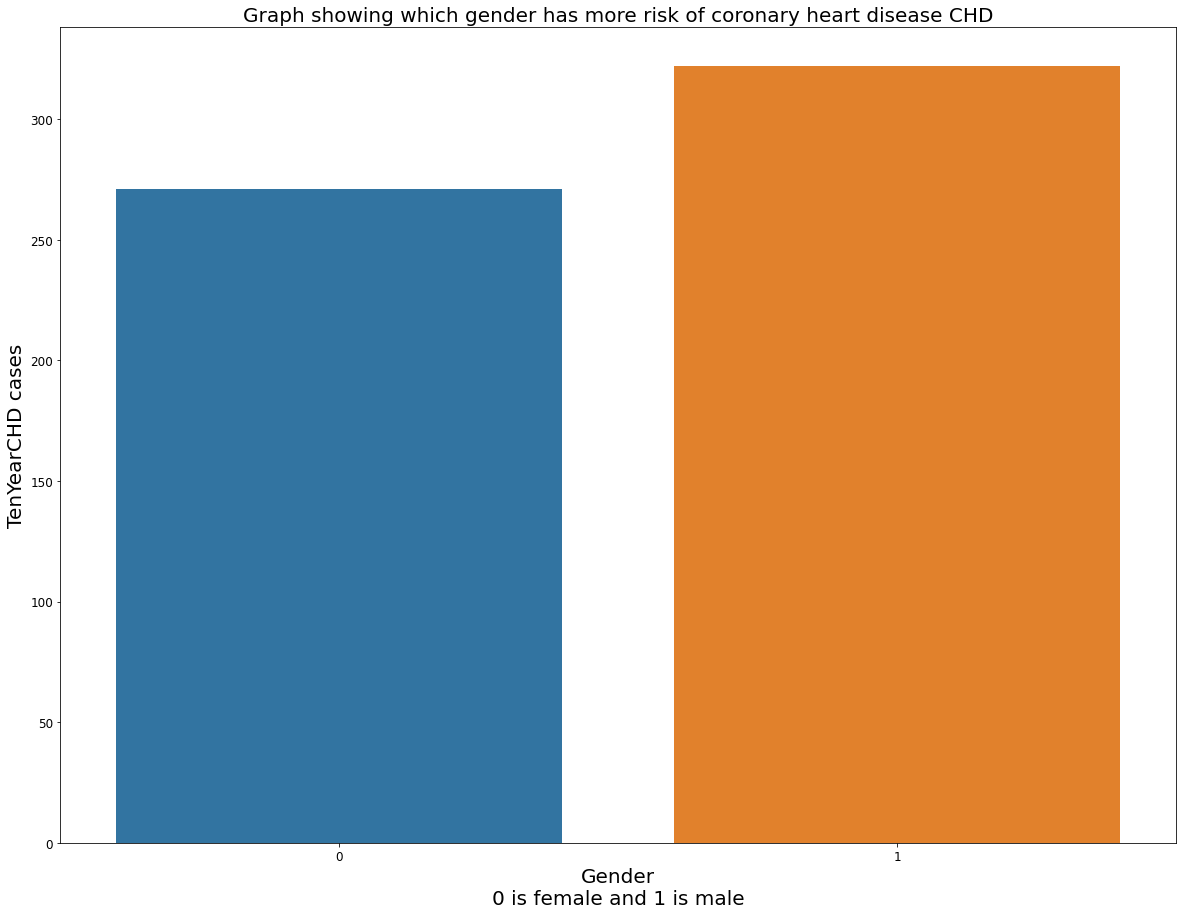

In [24]:
graph_2 = df.groupby('male', as_index=False).TenYearCHD.sum()

## Ploting the above values

plt.figure(figsize=(20,15), facecolor='w')
sns.barplot(x=graph_2['male'], y=graph_2['TenYearCHD'])
plt.title('Graph showing which gender has more risk of coronary heart disease CHD', size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

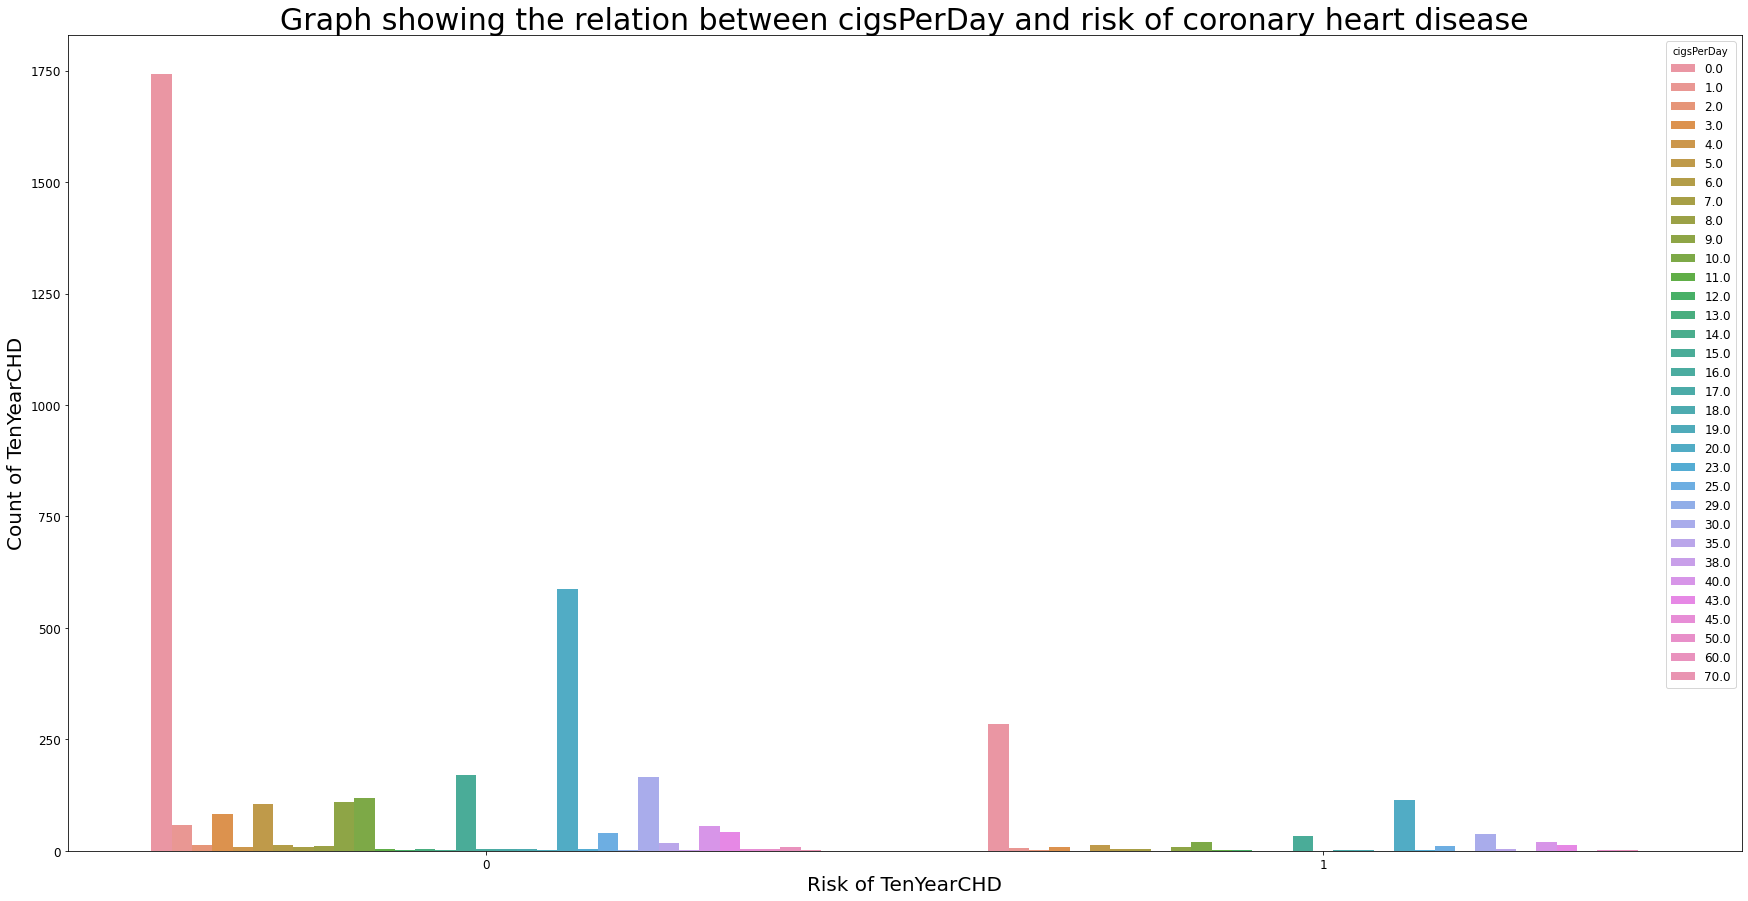

In [25]:
#Relation between cigsPerDay and risk of coronary heart disease.
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x='TenYearCHD',data=df, hue='cigsPerDay')
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [61]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0,0


(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

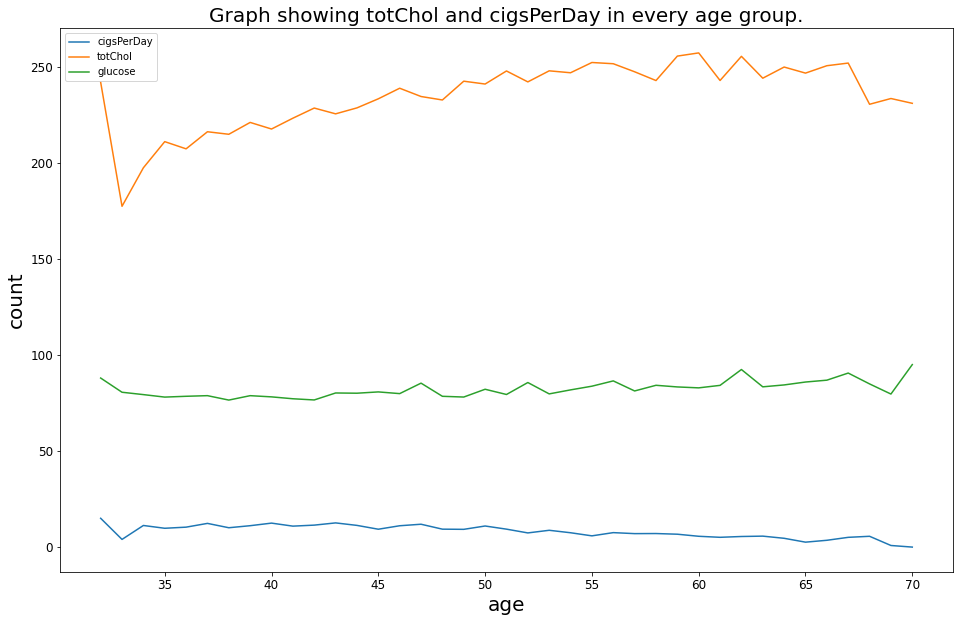

In [26]:
# Multivariate analysis

#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = df.groupby("age").cigsPerDay.mean()
graph_6 = df.groupby("age").totChol.mean()
graph_7 = df.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [27]:
target_1=df[df['TenYearCHD']==1]
target_0=df[df['TenYearCHD']==0]

In [28]:
target_1=resample(target_1,replace=True, n_samples=len(target_0),random_state=40)
target=pd.concat([target_0,target_1])
target['TenYearCHD'].value_counts()

df=target
df.shape

(6784, 16)

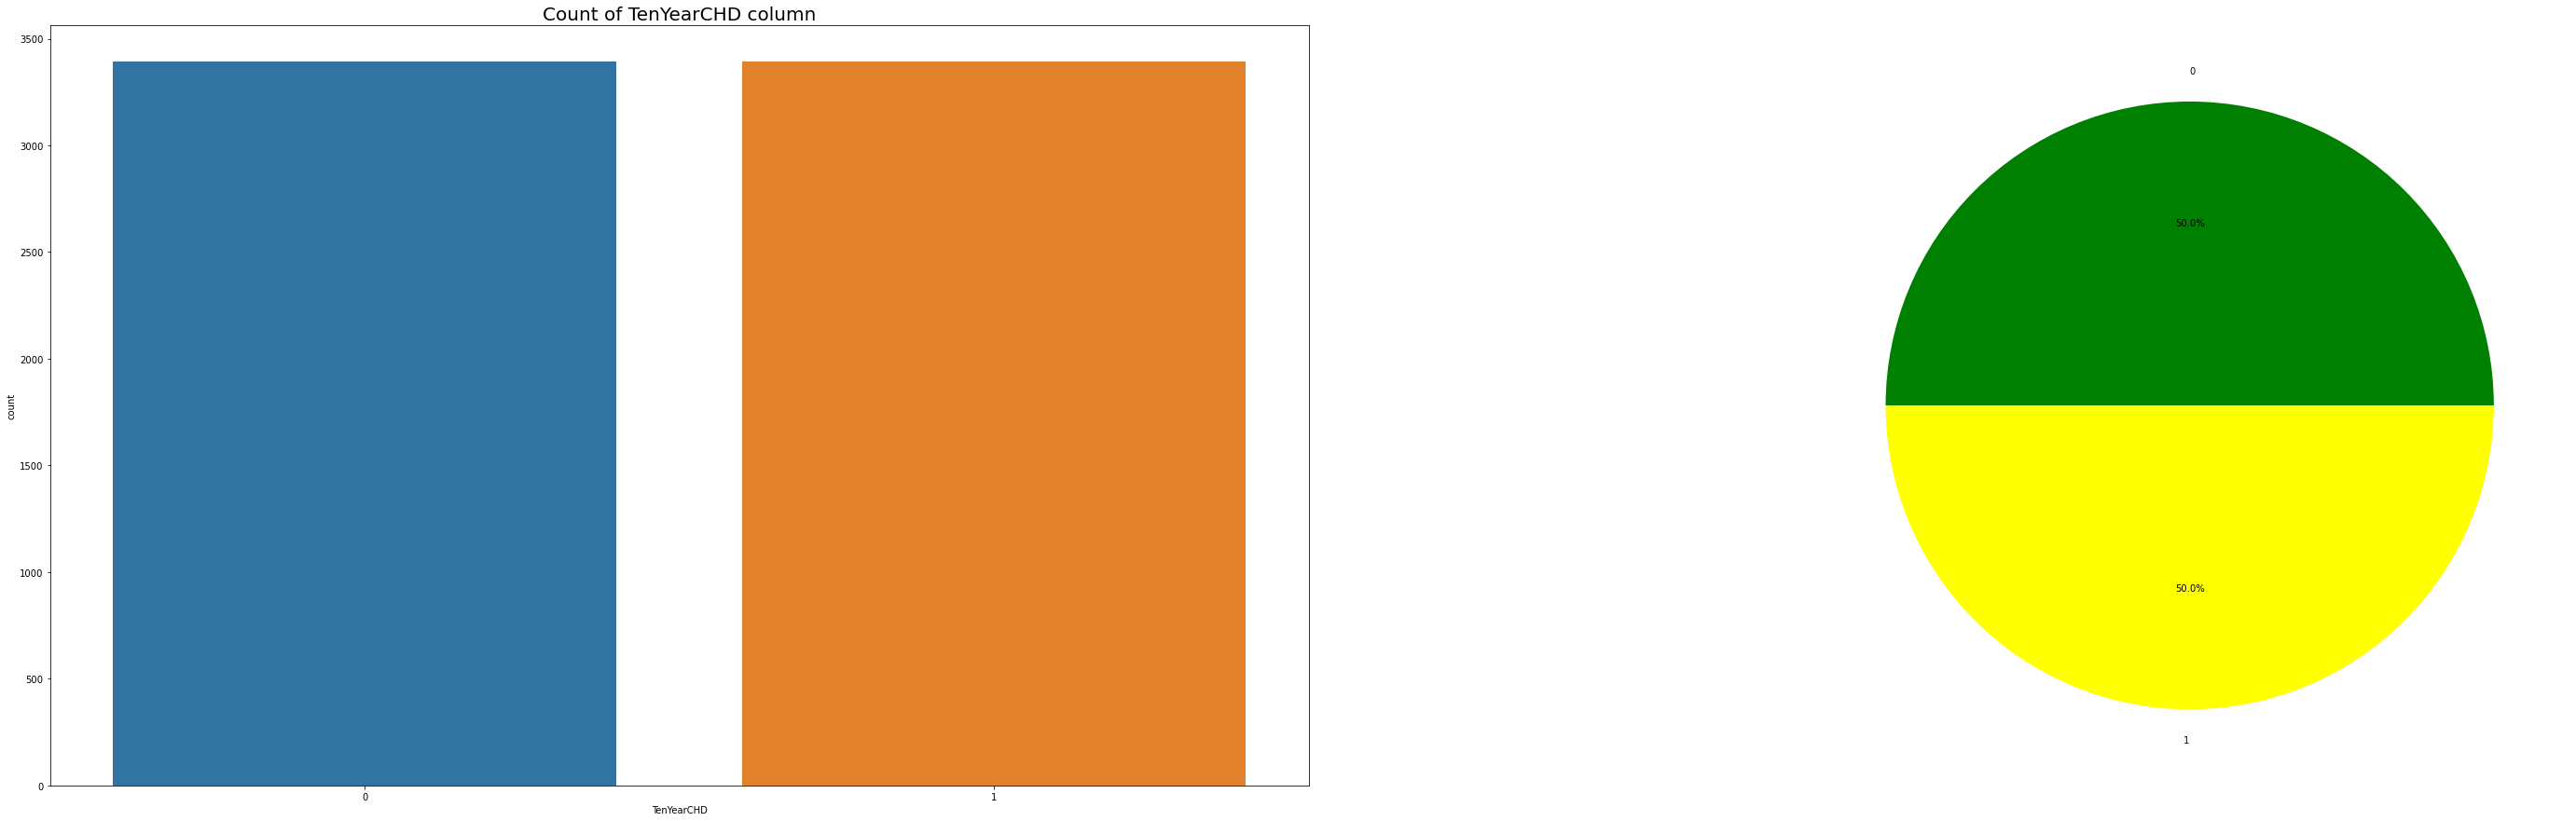

In [29]:
# Distrbution of heart diesase cases in the balanced dataset, the outcome variable

plt.figure(figsize=(30,15), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='TenYearCHD', data=df)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df['TenYearCHD'].value_counts(), autopct='%1.1f%%', labels=labels,colors=['green','yellow'])
plt.show()

In [30]:
# to identify the feature that have larger contibution towards the outcome variable, TenYearCHD

x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [31]:
print('x-', x.shape, '\ny-', y.shape)

x- (6784, 15) 
y- (6784,)


In [32]:
# Apply SelectKBest and extract top 10 featres
best = SelectKBest(score_func=chi2, k=10)
fit=best.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

#Join the two dataframe

scores = pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','scores']
print(scores.nlargest(11,'scores'))

         Feature       scores
10         sysBP  2127.940554
14       glucose  1233.362900
1            age  1004.535192
4     cigsPerDay   790.532235
9        totChol   766.291552
11         diaBP   488.928591
7   prevalentHyp   221.768997
0           male    66.816351
5         BPMeds    66.216216
8       diabetes    54.258065
12           BMI    44.855037


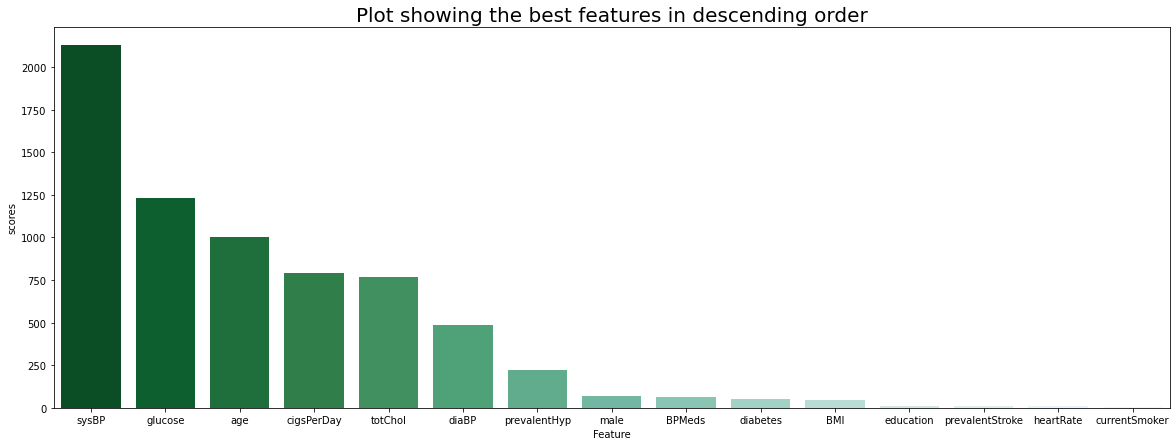

In [33]:
scores=scores.sort_values(by='scores', ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='scores',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [34]:
# Select top 10 feature 

features = scores['Feature'].tolist()[:10]
features

df=df[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
df.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0


In [35]:
y

0       0
1       0
2       0
4       0
5       0
       ..
4058    1
3489    1
1195    1
1691    1
2041    1
Name: TenYearCHD, Length: 6784, dtype: int64

In [36]:
y=df['TenYearCHD']
x=df.drop(['TenYearCHD'],axis=1)
train_x,test_x,train_y,test_y=train_test_split(x,y, test_size=0.4, random_state=1)

In [37]:
df

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4058,192.5,85.0,48,0.0,224.0,115.0,1,0,0.0,0,1
3489,248.0,77.0,62,0.0,298.0,130.0,1,0,1.0,0,1
1195,145.5,67.0,62,20.0,270.0,87.5,1,1,0.0,0,1
1691,169.0,79.0,64,0.0,372.0,85.0,1,0,0.0,0,1


In [38]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [39]:
ml = 'LogisticRegression'
lr = LogisticRegression(random_state=1,max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predct = lr.predict(test_x)
lr_con_matric = confusion_matrix(test_y, lr_predct)
lr_acc_score = accuracy_score(test_y, lr_predct)
print('confusion matrix')
print(lr_con_matric)
print('\n')
print('Accuracy of Logistic Regression:',lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predct))

confusion matrix
[[911 445]
 [437 921]]


Accuracy of Logistic Regression: 67.50184229918939 

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1356
           1       0.67      0.68      0.68      1358

    accuracy                           0.68      2714
   macro avg       0.68      0.68      0.68      2714
weighted avg       0.68      0.68      0.68      2714



In [40]:
ml_1 = 'Gradient Boosting Classifier'
gvc = GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predect = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predect)
gvc_acc_score = accuracy_score(test_y, gvc_predect)
print('Confusion Matrix')
print(gvc_conf_matrix)
print('\n')
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predect))

Confusion Matrix
[[960 396]
 [395 963]]


Accuracy of Gradient Boosting Classifier: 70.8548268238762 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1356
           1       0.71      0.71      0.71      1358

    accuracy                           0.71      2714
   macro avg       0.71      0.71      0.71      2714
weighted avg       0.71      0.71      0.71      2714



In [41]:
ml_2 = 'LGBMClassifier'
lg = LGBMClassifier(boosting_type='gbdt', n_estimators=5000,learning_rate=0.05,objective='binary', metric='accuracy',is_unbalance=True,
                 colsample_bytree=0.7,reg_lambda=3,reg_alpha=3,random_state=500,n_jobs=-1,num_leaves=35)
lg.fit(train_x,train_y)
lg_preduct = lg.predict(test_x)
lg_confu_matric = confusion_matrix(test_y,lg_preduct)
log_acc_scor = accuracy_score(test_y,lg_preduct)
print("confusion matrix")
print(lg_confu_matric)
print('\n')
print("LGBMClassifier:",log_acc_scor*100,'\n')
print(classification_report(test_y,lg_preduct))

confusion matrix
[[1088  268]
 [ 322 1036]]


LGBMClassifier: 78.26086956521739 

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1356
           1       0.79      0.76      0.78      1358

    accuracy                           0.78      2714
   macro avg       0.78      0.78      0.78      2714
weighted avg       0.78      0.78      0.78      2714



In [42]:
m4 = 'XGBClassifier'
xg = XGBClassifier(learning_rate=0.05, n_estimators = 100, max_depth=4, subsample = 0.9,colsample_bytree = 0.1, gamma=1,random_state=42)
xg.fit(train_x,train_y)
xg_predct = xg.predict(test_x)
xg_conf_matrix = confusion_matrix(test_y, xg_predct)
xg_acc_score = accuracy_score(test_y,xg_predct)
print("confusion matrix")
print(xg_conf_matrix)
print('\n')
print('XGBClassifier:',xg_acc_score*100,'\n')
print(classification_report(test_y,xg_predct))



C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix
[[952 404]
 [419 939]]


XGBClassifier: 69.67575534266764 

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1356
           1       0.70      0.69      0.70      1358

    accuracy                           0.70      2714
   macro avg       0.70      0.70      0.70      2714
weighted avg       0.70      0.70      0.70      2714



In [43]:
m5= 'MLPClassifier'
mlp=MLPClassifier(solver='adam', learning_rate_init=0.005, learning_rate='adaptive', activation='relu',max_iter=3000,random_state=10)
mlp.fit(train_x,train_y)
mlp_pred = mlp.predict(test_x)
mlp_conf_matr = confusion_matrix(test_y,mlp_pred)
mlp_acc_score = accuracy_score(test_y,mlp_pred)
print('Confusion matrix')
print(mlp_conf_matr)
print('\n')
print('MLPClassifier:',mlp_acc_score*100,'\n')
print(classification_report(test_y,mlp_pred))

lg_preduct
gvc_predect
xg_predct
mlp_pred

Confusion matrix
[[934 422]
 [429 929]]


MLPClassifier: 68.64406779661016 

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1356
           1       0.69      0.68      0.69      1358

    accuracy                           0.69      2714
   macro avg       0.69      0.69      0.69      2714
weighted avg       0.69      0.69      0.69      2714



In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [47]:
m6 = 'KNeighborsClassifier'
knn= KNeighborsClassifier(n_neighbors=1)
knn_model=knn.fit(train_x,train_y)
knn_pred = knn.predict(test_x)
knn_con_matrix = confusion_matrix(test_y,knn_pred)
knn_acc_score = accuracy_score(test_y,knn_pred)
print('confusion matrix')
print(knn_con_matrix)
print('\n')
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y,knn_pred))


confusion matrix
[[1112  244]
 [  44 1314]]


Accuracy of k-NN Classification: 89.38835666912307 

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1356
           1       0.84      0.97      0.90      1358

    accuracy                           0.89      2714
   macro avg       0.90      0.89      0.89      2714
weighted avg       0.90      0.89      0.89      2714



In [50]:
m8 = 'DecisionTreeClassifier'
dtc= DecisionTreeClassifier(criterion= 'entropy', random_state=0,max_depth=30)
dtc.fit(train_x,train_y)
dtc_pred = dtc.predict(test_x)
dtc_confu_matrix = confusion_matrix(test_y, dtc_pred)
dtc_acc_score = accuracy_score(test_y, dtc_pred)
print('confusion matrix')
print(dtc_confu_matrix)
print('\n')
print("Accuracy of DecisionTreeClassifier:",dtc_acc_score*100,'\n')
print(classification_report(test_y,dtc_pred))



confusion matrix
[[1078  278]
 [ 319 1039]]


Accuracy of DecisionTreeClassifier: 78.00294767870301 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1356
           1       0.79      0.77      0.78      1358

    accuracy                           0.78      2714
   macro avg       0.78      0.78      0.78      2714
weighted avg       0.78      0.78      0.78      2714



In [51]:
m9 = 'Support Vector Classifier'
svc = SVC(kernel = 'linear')
svc.fit(train_x,train_y)
svc_predicted = svc.predict(test_x)
svc_conf_matrix = confusion_matrix(test_y, svc_predicted)
svc_acc_score = accuracy_score(test_y, svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(test_y,svc_predicted))



confusion matrix
[[884 472]
 [424 934]]


Support Vector Classifier: 66.98599852616066 

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1356
           1       0.66      0.69      0.68      1358

    accuracy                           0.67      2714
   macro avg       0.67      0.67      0.67      2714
weighted avg       0.67      0.67      0.67      2714



In [52]:
m10 = 'Naive Bayes Classifier'
nbc = GaussianNB()
nbc.fit(train_x,train_y)
nbc_predicted = nbc.predict(test_x)
nbc_conf_matrix = confusion_matrix(test_y, nbc_predicted)
nbc_acc_score = accuracy_score(test_y, nbc_predicted)
print("confusion matrix")
print(nbc_conf_matrix)
print("\n")
print("Naive Bayes Classifier:",nbc_acc_score*100,'\n')
print(classification_report(test_y,nbc_predicted))



confusion matrix
[[1173  183]
 [ 898  460]]


Naive Bayes Classifier: 60.16949152542372 

              precision    recall  f1-score   support

           0       0.57      0.87      0.68      1356
           1       0.72      0.34      0.46      1358

    accuracy                           0.60      2714
   macro avg       0.64      0.60      0.57      2714
weighted avg       0.64      0.60      0.57      2714



In [55]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predct)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rfc_pred)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dtc_pred)
gvc_false_positive_rate,gvc_true_positive_rate,gvc_threshold = roc_curve(test_y,gvc_predect)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(test_y,svc_predicted)
nbc_false_positive_rate,nbc_true_positive_rate,nbc_threshold = roc_curve(test_y,nbc_predicted)
lg_false_positive_rate,lg_true_positive_rate,lg_threshold = roc_curve(test_y,lg_preduct)
xg_false_positive_rate,xg_true_positive_rate,xg_threshold = roc_curve(test_y,xg_predct)
mlp_false_positive_rate,mlp_true_positive_rate,mlp_threshold = roc_curve(test_y,mlp_pred)

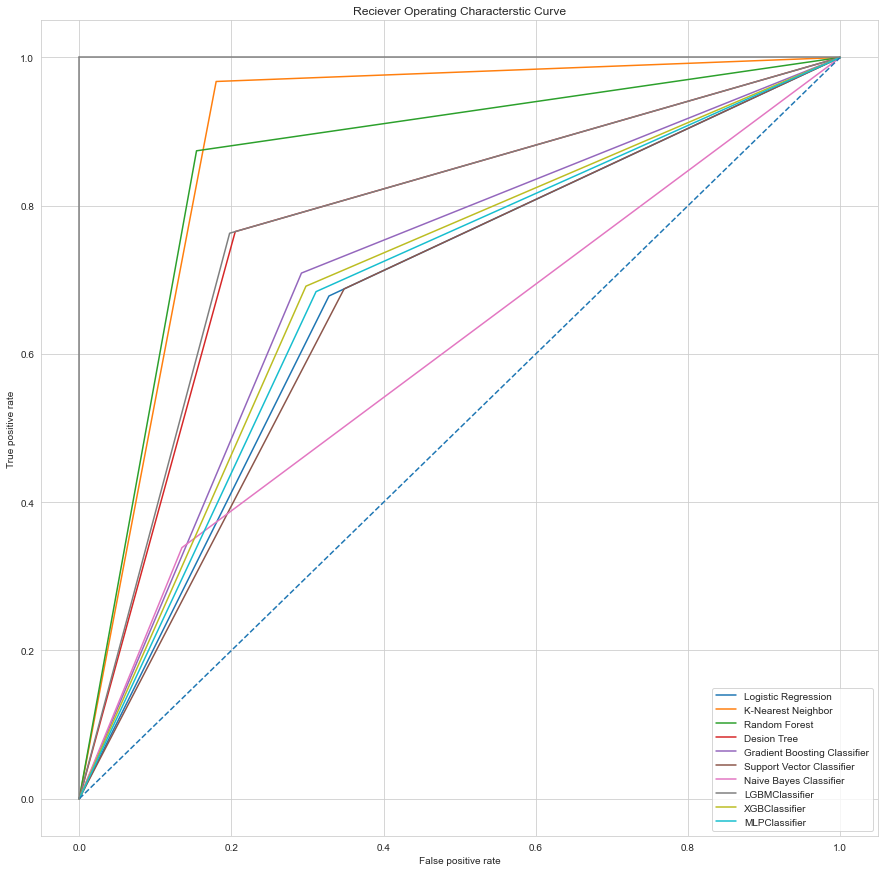

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gvc_false_positive_rate,gvc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(nbc_false_positive_rate,nbc_true_positive_rate,label='Naive Bayes Classifier')
plt.plot(lg_false_positive_rate,lg_true_positive_rate,label='LGBMClassifier')
plt.plot(xg_false_positive_rate,xg_true_positive_rate,label='XGBClassifier')
plt.plot(mlp_false_positive_rate,mlp_true_positive_rate,label='MLPClassifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()